x_train: (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 : loss 0.999957
iteration 5 : loss 0.936902
iteration 10 : loss 0.872399
iteration 15 : loss 0.853965
iteration 20 : loss 0.846077
iteration 25 : loss 0.843092
iteration 30 : loss 0.835071
iteration 35 : loss 0.828294
iteration 40 : loss 0.830192
iteration 45 : loss 0.822422
iteration 50 : loss 0.814757
iteration 55 : loss 0.814229
iteration 60 : loss 0.807593
iteration 65 : loss 0.805353
iteration 70 : loss 0.799752
iteration 75 : loss 0.807080
iteration 80 : loss 0.801118
iteration 85 : loss 0.794303
iteration 90 : loss 0.790440
iteration 95 : loss 0.789078
iteration 100 : loss 0.786413
iteration 105 : loss 0.797118
iteration 110 : loss 0.786061
iteration 115 : loss 0.783692
iteration 120 : loss 0.788823
iteration 125 : loss 0.781073
iteration 130 : loss 0.775959
iteration 135 : loss 0.776498
iteration 140 : loss 0.774897
iteration 145 : loss 0.776944
iteration 150 : loss 0.776814
iteration 155

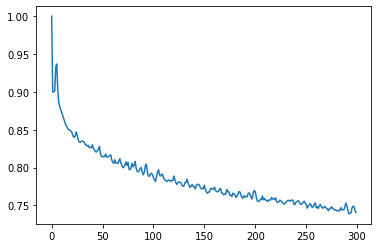

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std = 1e-5
H = 200
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H)
w2 = std*np.random.randn(H, K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 1.0e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

x_l = x_train * 255

for t in range(iterations):
    indices = np.random.choice(Ntr,batch_size)
    rng.shuffle(indices)
    x = x_l[indices]
    y = y_train[indices]
    h_l = 1.0 / (1.0 + np.exp(-(x.dot(w1)+b1))) 
    y_pre = h_l.dot(w2) + b2
    loss = (1./ batch_size) * np.square(y_pre - y).sum() + reg * (np.sum(w1 * w1) + np.sum(w2 * w2))
    loss_history.append(loss)
    if t % 5 == 0:
        print('iteration %d : loss %f' % (t,loss))
    
    dl_yp = (1./ batch_size) * 2.0 * (y_pre - y)
    dw2 = h_l.T.dot(dl_yp) + reg * w2
    db2 = dl_yp.sum(axis=0)
    dl_h = dl_yp.dot(w2.T)
    dw1 = x.T.dot(dl_h * h_l * (1 - h_l)) + reg * w1
    db1 = (dl_h * h_l * (1 - h_l)).sum(axis=0)
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2
    lr *= lr_decay

plt.plot(loss_history)

x_t = x_train * 255
h_l = 1.0 / (1.0 + np.exp(-(x_t.dot(w1) + b1)))
y_pre = h_l.dot(w2) + b2
train_loss = (1/Ntr) * (np.square(y_train - y_pre)).sum()
print('Training Loss :',train_loss)

acc_check = 0
for i in range(y_train.shape[0]):
    list_pre = y_pre[i].tolist()
    list_train = y_train[i].tolist()
    if list_pre.index(max(list_pre)) == list_train.index(max(list_train)):
        acc_check += 1

train_accuracy = (1/Ntr) * acc_check
print('Training Accuracy :',train_accuracy)

x_t = x_test * 255
h_l = 1.0 / (1.0 + np.exp(-(x_t.dot(w1) + b1)))
y_pre = h_l.dot(w2) + b2
test_loss = (1/Nte) * (np.square(y_test - y_pre)).sum()
print('Testing Loss :',test_loss)

acc_check = 0
for i in range(y_test.shape[0]):
    list_pre = y_pre[i].tolist()
    list_train = y_test[i].tolist()
    if list_pre.index(max(list_pre)) == list_train.index(max(list_train)):
        acc_check += 1

test_accuracy = (1/Nte) * acc_check
print('Testing Accuracy :',test_accuracy)